# Bézier Curve Demo
Here we demonstrate a Bézier curve as a mapping from a scalar length
to a position in a higher dimensional space. This mapping relies on a set of
basis functions and is parameterized by a set of control points.

## Initial Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Enable usage of real TeX for labels and captions
from matplotlib import rc
rc('text', usetex=True)

# Custom package for computing basis functions and derivatives
import bernstein

## Bernstein Basis Functions
Bernstein basis functions are fundamental to the definition of Bézier curves and
their convenient mathematical properties.

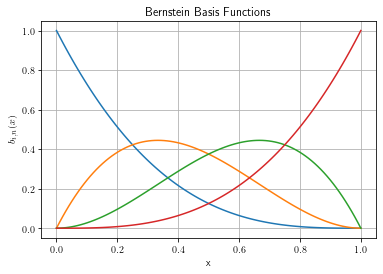

In [2]:
x = np.linspace(0,1,100)
n = 3
B = bernstein.bbasis(x,n)

fig = plt.figure(1)
plt.clf()
plt.plot(x,B)
plt.title("Bernstein Basis Functions")
plt.xlabel("x")
plt.ylabel("$b_{i,n}(x)$")
plt.grid(True)


## Bernstein Derivative

Derivatives of the Bernstin basis vectors are available analytically. Here we
quantify our ability to compute these derivatives correctly by contrasting the
result with finite difference approximations.

Each Bernstin basis function is a scalar-valued function of a single variable.
However, we compute the derivatives of all basis functions simultaneously for
multiple query points. We select an initial vector query points and
numerically compute the derivative for all basis functions at multiple step
sizes.

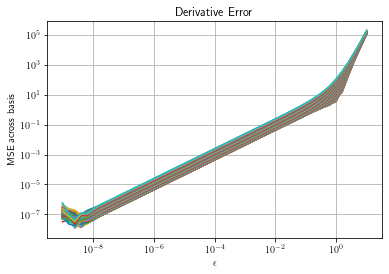

In [3]:
# Query points
x0 = np.linspace(0,1,100)
# Basis order
n = 5

fctn = lambda x: bernstein.bbasis(x,n)
# Analytic derivatives at x0 (matrix - not a Jacobian)
g = bernstein.bbasisderivative(x0,n)
# Initial function values (vector)
f0 = fctn(x0)

# Step size
Nsteps = 50
e0=1e-9
eps_all = e0*np.logspace(0,10,num=Nsteps)
err = np.zeros((len(x0),Nsteps))
for s in range(Nsteps):
    eps = eps_all[s]
    # Numeric gradient
    ghat = (fctn(x0 + eps) -f0)/eps
    err[:,s] = np.linalg.norm(np.abs(ghat-g),axis=1)


fig = plt.figure(1)
plt.clf()
plt.loglog(eps_all,err.T)
plt.title("Derivative Error")
plt.xlabel(r'$\epsilon$')
plt.ylabel("MSE across basis")
plt.grid(True)

## Bézier Curve
We now generate an example Bézier curve. We use 4 control points which implies a
cubic curve. In addition to plotting the curve and control points, we label a
single point (length along the curve) $x_0$. At $x_0$ we indicate the
directional derivative of (tangent to) the curve.


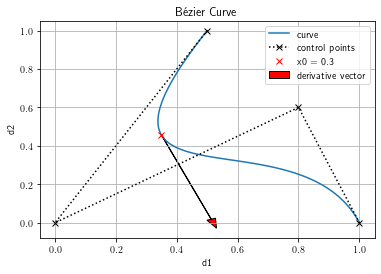

In [4]:

# Specify control points
#A = np.array([[0.5,1.],[0.,0.],[1,1],[1.,0.]])
A = np.array([[0.5,1.],[0.,0.],[0.8,0.6],[1.,0.]])

# Compute Bernstein basis
n=A.shape[0]-1
x = np.linspace(0,1,100)
B = bernstein.bbasis(x,n)

# Curve
C=B@A

# Compute position and tangent at a specific length
x0 = 0.3
c0 = bernstein.bbasis(x0,n)@A
d0 = bernstein.bbasisderivative(x0,n)@A

# Plotting function
fig = plt.figure(2)
plt.clf()
plt.plot(C[:,0],C[:,1],label='curve')
plt.plot(A[:,0],A[:,1],'kx:',label='control points')
plt.plot(c0[0],c0[1],'rx',label="x0 = %g"%x0)
plt.arrow(c0[0],c0[1],0.5*d0[0],0.5*d0[1],head_width=0.03, head_length=0.05,fc='r', ec='k',label="derivative vector")
plt.title(r'B\'ezier Curve')
plt.xlabel("d1")
plt.ylabel("d2")
plt.legend()
plt.grid(True)